In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Salary Project.csv')

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


# checking of null value

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [10]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [11]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [15]:
df_visualization_nominal=df[['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']].copy()

In [16]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Visualization of data

In [17]:
import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


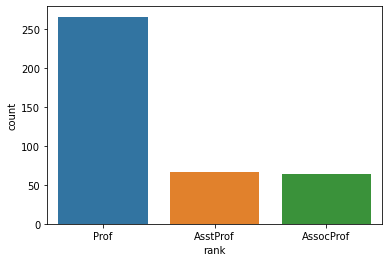

In [18]:
ax=sns.countplot(x="rank",data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


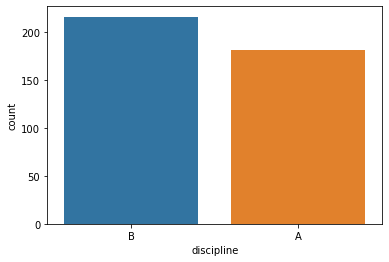

In [19]:
ax=sns.countplot(x="discipline",data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


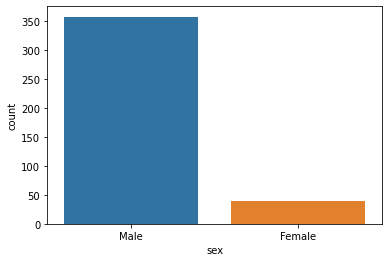

In [25]:
ax=sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

# making dataframe of the ordinal data

In [33]:
df_vizualization_ordinal=df[["rank","yrs.service"]].copy()

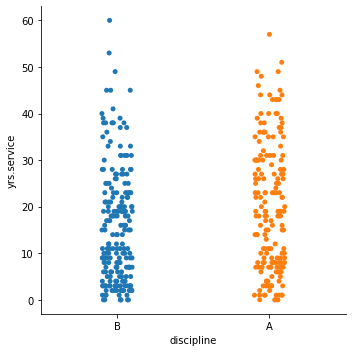

In [34]:
sns.catplot(x="discipline",y="yrs.service",data=df)

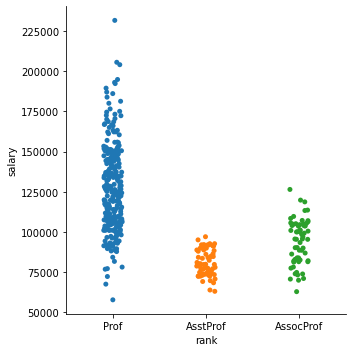

In [35]:
sns.catplot(x="rank",y="salary",data=df)

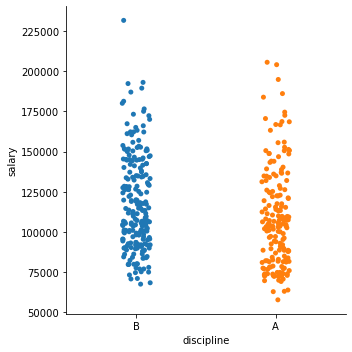

In [36]:
sns.catplot(x="discipline",y="salary",data=df)

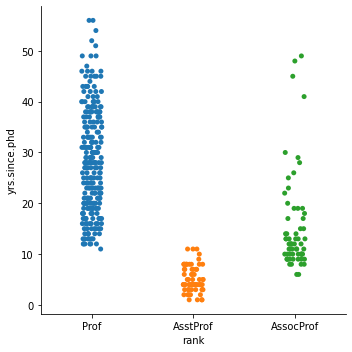

In [39]:
sns.catplot(x="rank",y="yrs.since.phd",data=df)

# encoding of dataframe

In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [41]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [43]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

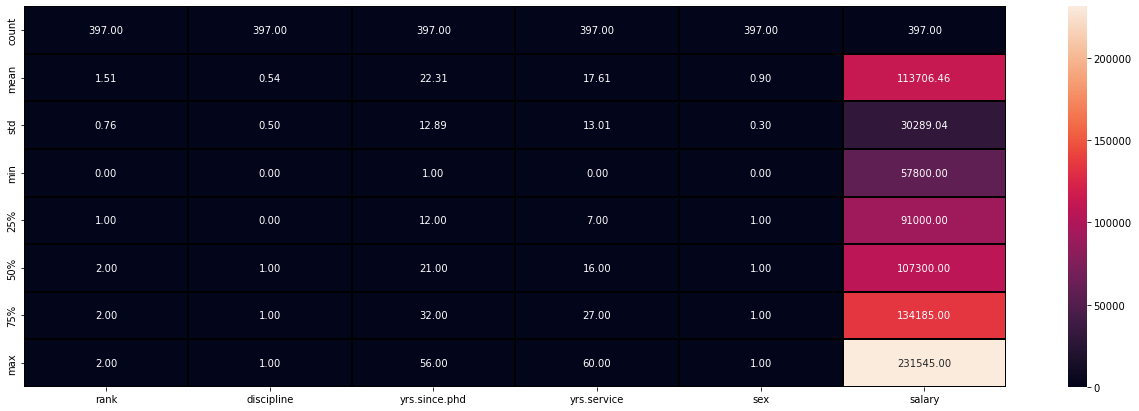

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

In [45]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

In [46]:
df.corr()['yrs.service'].sort_values()

discipline      -0.164599
sex              0.153740
salary           0.334745
rank             0.447499
yrs.since.phd    0.909649
yrs.service      1.000000
Name: yrs.service, dtype: float64

<AxesSubplot:>

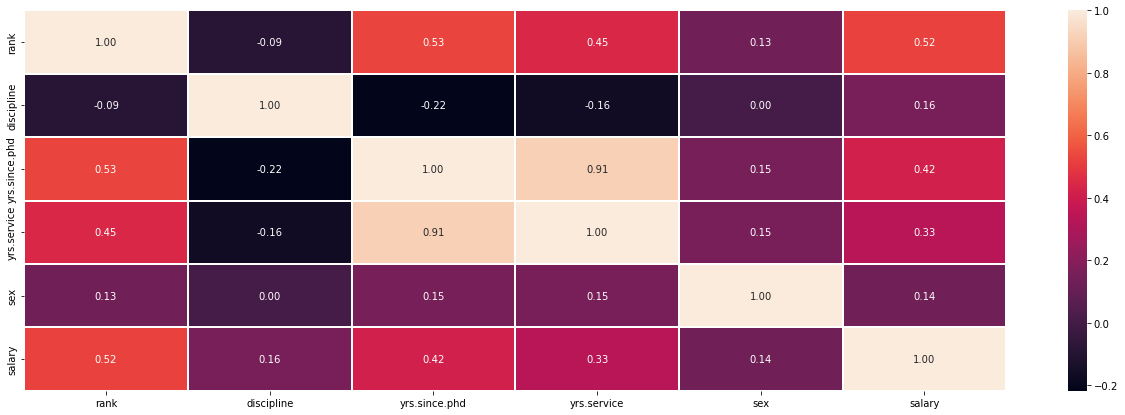

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,fmt='0.2f',)

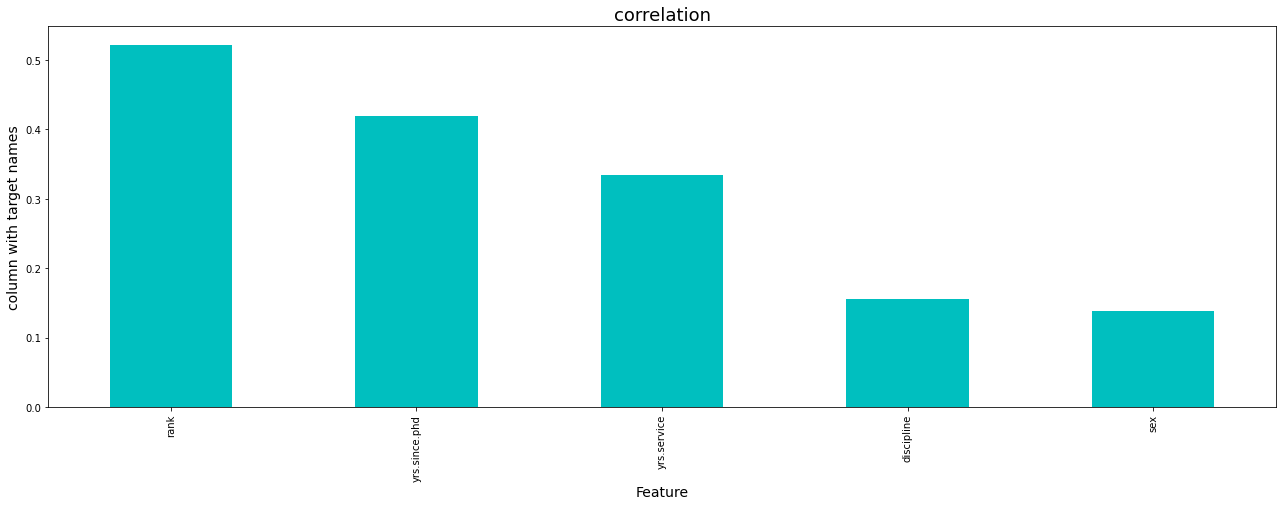

In [54]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()        

In [55]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [56]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

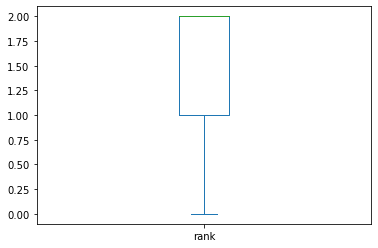

In [58]:
df['rank'].plot.box()

<AxesSubplot:>

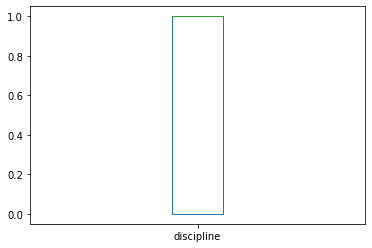

In [59]:
df['discipline'].plot.box()

<AxesSubplot:>

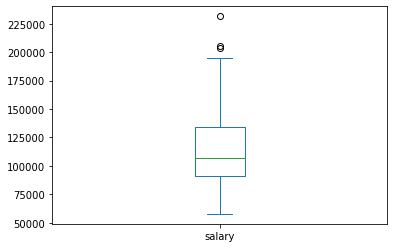

In [60]:
df['salary'].plot.box()

<AxesSubplot:>

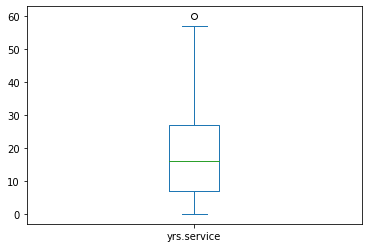

In [61]:
df['yrs.service'].plot.box()

In [62]:
df.shape

(397, 6)

In [63]:
df['discipline'].unique()

array([1., 0.])

In [64]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

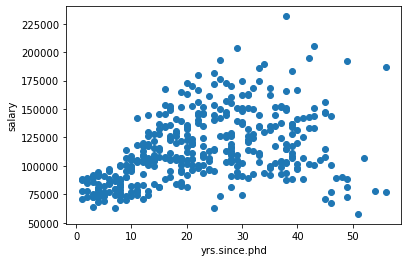

In [129]:
plt.scatter(df['yrs.since.phd'],df['salary'])
plt.xlabel('yrs.since.phd')
plt.ylabel('salary')
plt.show()

In [131]:
X=df.drop('salary',axis=1)
y=df['salary']

In [132]:
X.shape , y.shape

((397, 5), (397,))

In [153]:
X_train , X_test , Y_train,Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((317, 5), (80, 5), (317,), (80,))

In [154]:
lr = LinearRegression()

In [155]:
lr.fit(X_train,Y_train)

LinearRegression()

In [156]:
Y_test

38     125196
187    107500
221    145200
109    131205
91     105128
        ...  
181    141136
17     103450
89     107008
57      90215
255     83000
Name: salary, Length: 80, dtype: int64

In [157]:
pred=lr.predict(X_test)

In [158]:
pred

array([141377.51525665, 129248.21575335, 135068.30987947, 124515.99743953,
        89254.17804762, 123900.44450617,  88543.38044848, 135776.79419788,
        88090.1592224 ,  94030.81639584, 121029.5370879 , 131120.71889698,
       131027.78751193,  84403.07849834, 108894.64146055, 118701.49943745,
        80776.95344653, 126222.88603257,  76351.44346106, 121976.14716856,
       127398.09710588, 135908.83200421, 140427.27337473, 127617.47017322,
       133004.4142887 ,  86695.57508175, 121732.42528227, 125767.35152576,
       131834.79933943, 110525.38704067, 114500.95864337, 132537.6875338 ,
       130429.0229507 , 128573.30817919,  78223.9466047 , 119843.1337665 ,
       111689.4058659 ,  88076.65369358, 133004.4142887 , 120574.00258108,
       114500.95864337,  79727.90154459,  95563.38342481, 127848.03548865,
       122730.8295569 , 146725.28650383, 111464.43667451, 115901.13890806,
       103537.99124602,  91511.66880918, 126706.4011596 ,  85512.45460367,
       133240.57572817, 1

In [159]:
Y_test

38     125196
187    107500
221    145200
109    131205
91     105128
        ...  
181    141136
17     103450
89     107008
57      90215
255     83000
Name: salary, Length: 80, dtype: int64

In [160]:
diff=Y_test-pred

In [161]:
pd.DataFrame(np.c_[Y_test,pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,125196.0,141377.515257,-16181.515257
1,107500.0,129248.215753,-21748.215753
2,145200.0,135068.309879,10131.690121
3,131205.0,124515.997440,6689.002560
4,105128.0,89254.178048,15873.821952
...,...,...,...
75,141136.0,132734.676105,8401.323895
76,103450.0,120096.083578,-16646.083578
77,107008.0,88090.159222,18917.840778
78,90215.0,87392.867152,2822.132848


In [164]:

lr.score(X_test ,Y_test)

0.39087352802385156

In [167]:
print(lr.score(X_test,Y_test))

0.39087352802385156


In [165]:
rmse=np.sqrt(mean_squared_error(Y_test ,pred))
r2=r2_score(Y_test,pred)

In [166]:
rmse ,r2

(24900.075865488547, 0.39087352802385156)